In [2]:
# for rendering Latex

import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

# Using seaborn's style
#plt.style.use('science')
#plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-dark-palette')
#plt.style.use('seaborn-deep')


width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

/var/folders/v1/1r3cbng93gg6xsx3ghwzpk9c0000gn/T/ipykernel_36578/3664393869.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [3]:
# imports
import numpy as np
import os

import sys
sys.path.append('../')

from src.utils import load_data

DATA_DIR = '../data'
BETA_VALUES = np.sort(
    [float(x.split('fermi_')[-1]) for x in os.listdir(DATA_DIR) if x.startswith('fermi')])

print('Beta values:',len(BETA_VALUES))

Beta values: 30


(1200000, 64) (200000, 64) (10000, 64)


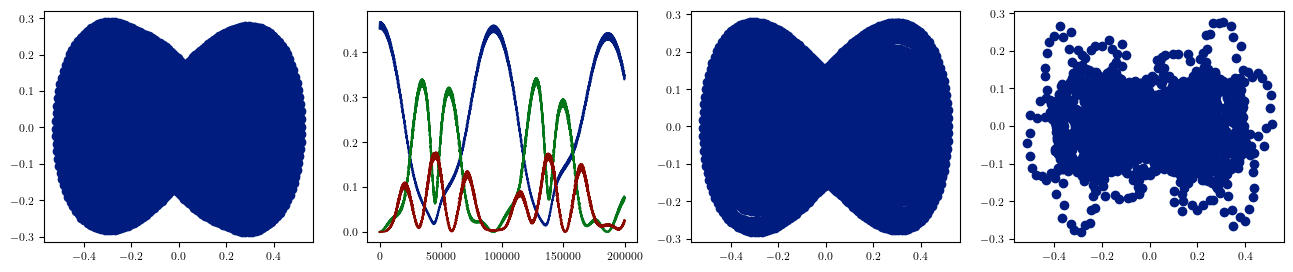

In [4]:
# Just to visualise data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3))


data = load_data(DATA_DIR, 1.6)
X = data.data_matrix

q, p = X[:, 0], X[:, 32]

ax1.scatter(q, p)
n_portion = 200000

ax2.plot(data.energy_matrix[:,0][:n_portion], linewidth=1.5, label="Mode 1") 
ax2.plot(data.energy_matrix[:,2][:n_portion], linewidth=1.5, label="Mode 3")
ax2.plot(data.energy_matrix[:,4][:n_portion], linewidth=1.5, label="Mode 5")

# take portion of data

X_portion = X[:n_portion]
q_portion, p_portion = X_portion[:, 0], X_portion[:, 32]

ax3.scatter(q_portion, p_portion)

# subsample data
X_subsample = X_portion[0::20]
q_subsample, p_subsample = X_subsample[:, 0], X_subsample[:, 32]

ax4.scatter(q_subsample, p_subsample)

print(X.shape, X_portion.shape, X_subsample.shape)

In [29]:
# COMPUTE EXPLAINED VARIANCE RATIO VS ENERGY 

from src.utils import compute_explained_ratio
from tqdm import tqdm

EVR_vs_energy = list()
EVR_vs_energy_pp = list() # with preprocessing

for beta in tqdm(BETA_VALUES):

    data = load_data(DATA_DIR, beta)
    X = data.data_matrix
    
    ER = compute_explained_ratio(
        X, n_components=X.shape[1], pre_whitening=False, verbose=False)

    ER_pw = compute_explained_ratio(
        X, n_components=X.shape[1], pre_whitening=True, verbose=False)

    EVR_vs_energy.append(ER)
    EVR_vs_energy_pp.append(ER_pw)

100%|██████████| 30/30 [04:12<00:00,  8.42s/it]


In [30]:
# import pickle

# with open('data/EVR_vs_energy.pkl', 'wb') as f:
#     pickle.dump(EVR_vs_energy, f) 
    
# with open('data/EVR_vs_energy_pw.pkl', 'wb') as f:
#     pickle.dump(EVR_vs_energy_pp, f) 
    

# with open('data/EVR_vs_energy.pkl', 'rb') as f:
#     EVR_vs_energy = pickle.load(f) 

# with open('data/EVR_vs_energy_pw.pkl', 'rb') as f:
#     EVR_vs_energy_pw = pickle.load(f) 

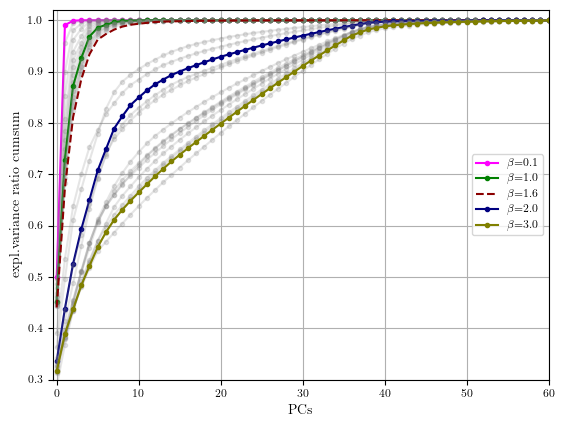

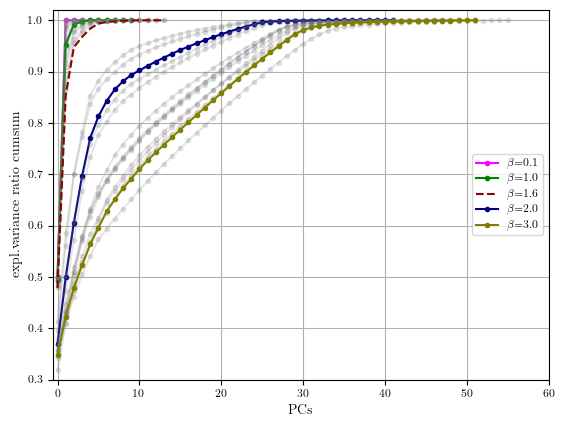

In [75]:
# Explained ratio bs beta plots 
from itertools import cycle
color_cycle = cycle(['magenta', 'green', 'navy', 'olive'])


lim = 1000
for x, beta in zip(EVR_vs_energy[:lim], BETA_VALUES[:lim]):
    if beta in [0.1, 1.0, 2.0, 3.0]:
        plt.plot(x.cumsum(), ".-", c=next(color_cycle), label=rf'$\beta$={beta}')
    elif beta == 1.6:
        plt.plot(x.cumsum(), "--", label=rf'$\beta$={beta}', color='darkred')
    else:
        plt.plot(x.cumsum(), ".-", c='gray', alpha=0.2)
    
plt.legend(loc='right')
plt.xlim(-0.6, 60)
plt.ylim(0.3, 1.02)

plt.grid()
plt.xlabel('PCs')
plt.xlim(-0.5, 60)
plt.ylabel('expl.variance ratio cumsum')
plt.savefig("output/er_vs_beta_no_preprocessing.pdf")
plt.show()

lim = 1000
for x, beta in zip(EVR_vs_energy_pp[:lim], BETA_VALUES[:lim]):
    if beta in [0.1, 1.0, 2.0, 3.0]:
        plt.plot(x.cumsum(), ".-", c=next(color_cycle), label=rf'$\beta$={beta}')
    elif beta == 1.6:
        plt.plot(x.cumsum(), "--", label=rf'$\beta$={beta}', color='darkred')
    else:
        plt.plot(x.cumsum(), ".-", c='gray', alpha=0.2)
    
plt.legend(loc='right')
plt.xlim(-0.6, 60)
plt.ylim(0.3, 1.02)
plt.grid()
plt.xlabel('PCs')
plt.ylabel('expl.variance ratio cumsum')

plt.savefig("output/er_vs_beta_preprocessing.pdf")

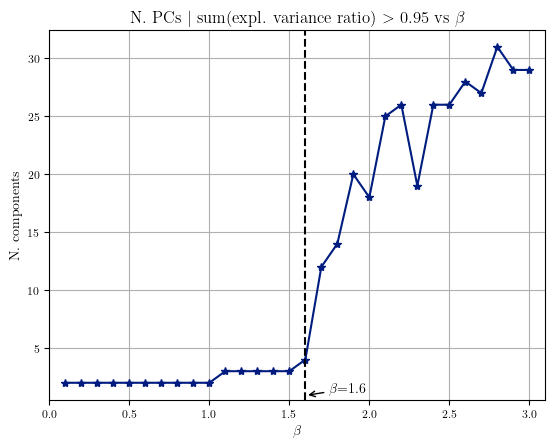

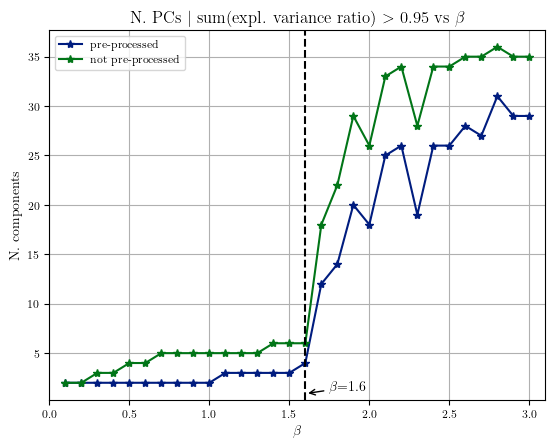

In [86]:
# plots of N PCs such that the sum of explained variace ratio is above 0.95, Vs beta

# only preprocessed
plt.plot(BETA_VALUES, [(x.cumsum()<0.95).sum() + 1 for x in EVR_vs_energy_pp], '*-')
beta_c = 1.6
plt.axvline(beta_c, color='k', linestyle='--')
plt.title(r'N. PCs $|$ sum(expl. variance ratio) $>$ 0.95 vs $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel('N. components')
plt.grid()
plt.xlim(0, 3.1)
plt.annotate(r'$\beta$=1.6', xy=(1.6, 0.9), xytext=(1.75, 1.2), arrowprops=dict(arrowstyle="->"))
plt.savefig("output/n_pcs_95_vs_beta.pdf")
plt.show()

plt.plot(BETA_VALUES, [(x.cumsum()<0.95).sum() + 1 for x in EVR_vs_energy_pp], '*-', label='pre-processed')
plt.plot(BETA_VALUES, [(x.cumsum()<0.95).sum() + 1 for x in EVR_vs_energy], '*-', label='not pre-processed')
beta_c = 1.6
plt.axvline(beta_c, color='k', linestyle='--')
plt.title(r'N. PCs $|$ sum(expl. variance ratio) $>$ 0.95 vs $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel('N. components')
plt.legend()
plt.grid()
plt.xlim(0, 3.1)
plt.annotate(r'$\beta$=1.6', xy=(1.6, 0.9), xytext=(1.75, 1.2), arrowprops=dict(arrowstyle="->"))
plt.savefig("output/n_pcs_95_vs_beta_comparison.pdf")

In [104]:
# COMPUTE COVARIANCE MATRIX VS BETA

from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA 
from tqdm import tqdm

scaler = StandardScaler()

data = load_data(DATA_DIR, 0.1)
X = scaler.fit_transform(data.data_matrix)
mat_cov_rif = np.cov(X.T, bias=True)

distances_qp = list()
for beta in tqdm(BETA_VALUES):
    
    data = load_data(DATA_DIR, beta)
    X = scaler.fit_transform(data.data_matrix)
    mat_cov = np.cov(X.T, bias=True)

    pro = np.matmul(mat_cov_rif, mat_cov)
    tr = np.trace(pro)
    norm1 = LA.norm(mat_cov_rif, 'fro')  #CMD
    norm2 = LA.norm(mat_cov, 'fro')
    norm3 = norm1 * norm2
    ratio = tr/norm3
    distCov = 1 - ratio
    distances_qp.append(distCov)

100%|██████████| 30/30 [00:41<00:00,  1.38s/it]


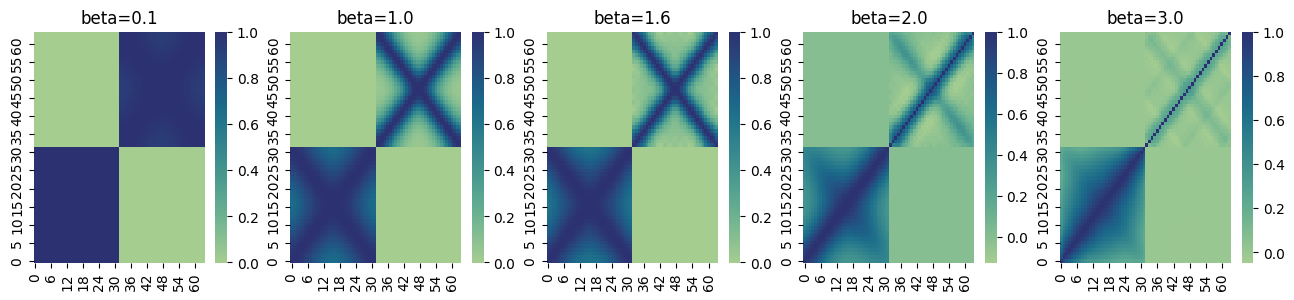

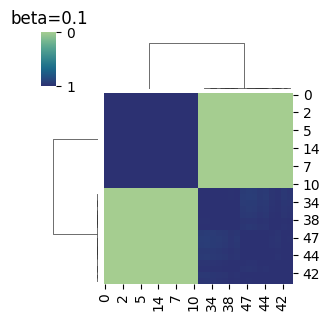

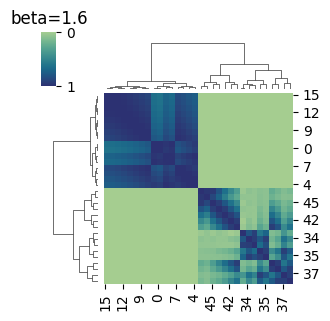

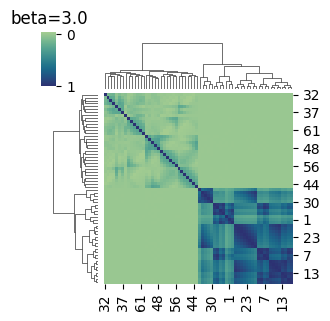

In [83]:
import seaborn as sn

fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, beta in enumerate([0.1, 1.0, 1.6, 2.0, 3.0]):
    
    data = load_data(DATA_DIR, beta)
    X = scaler.fit_transform(data.data_matrix)
    mat_cov = np.cov(X.T, bias=True)

    sn.heatmap(mat_cov, annot=False, cmap="crest", ax=axs[i]) #fmt='g' [:32,:32]
    axs[i].invert_yaxis()
    axs[i].set_title(f"beta={beta}")

##
for i, beta in enumerate([0.1, 1.6, 3.0]):
    data = load_data(DATA_DIR, beta)
    X = scaler.fit_transform(data.data_matrix)
    mat_cov = np.cov(X.T, bias=True)

    sn.clustermap(mat_cov, cmap="crest", figsize=(3,3))
    plt.title(f"beta={beta}")
    # plt.gca().invert_yaxis()
    plt.show()

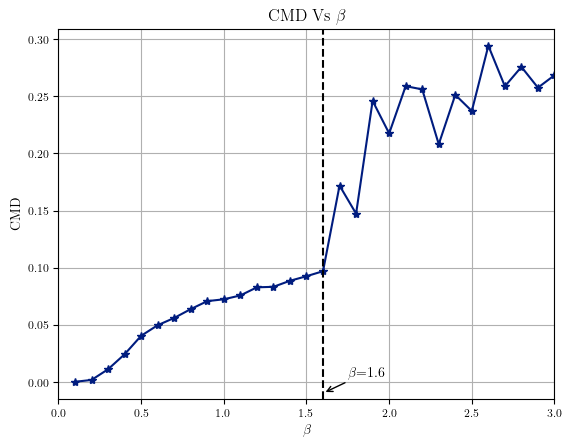

In [168]:
# plots of CMD versus beta

plt.plot(BETA_VALUES, distances_qp, '*-')
# plt.plot(BETA_VALUES, distances, '*-', label='q only')
beta_c = 1.6
plt.axvline(beta_c, color='k', label=rf'$\beta$={beta_c}', linestyle='--')
plt.grid()
plt.title(r'CMD Vs $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel('CMD')
plt.xlim(0., 3)
plt.annotate(r'$\beta$=1.6', xy=(1.6, -0.01), xytext=(1.75, 0.005), arrowprops=dict(arrowstyle="->"))
# plt.xticks(list(plt.xticks()[0]) + [1.6])
# plt.legend()

plt.savefig("output/cmd_vs_beta.pdf")

## OLD STUFF

In [94]:
# ##
# from scipy.fft import fft, ifft
# import scipy.fftpack

# # data = load_data(0.1)
# # data = load_data(0.7)
# # data = load_data(1.6)
# data = load_data(2.4)
# X = data.data_matrix[:8000]
# n_points, n_dim = X.shape

# grad = [ np.gradient(X[:, i]) for i in range(n_dim)]
# velocity = np.array([ [di_dt[i] for di_dt in grad] for i in range(n_points)])
# ds_dt = np.sqrt(np.array([di_dt ** 2 for di_dt in grad]).sum(axis=0))
# tangent = np.array([1 / ds_dt] * n_dim).transpose() * velocity
# grad_tangent = [np.gradient(tangent[:, i]) for i in range(n_dim)]
# dT_dt = np.array([ [grad_tangent[j][i] for j in range(n_dim) ] for i in range(n_points)])
# length_dT_dt = np.sqrt(np.array([grad_tangent[j] ** 2 for j in range(n_dim)]).sum(axis=0))
# normal = np.array([1 / length_dT_dt] * n_dim).transpose() * dT_dt
# # Note that the normal vector represents the direction in which the curve is turning. 

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

# for i in range(32):
#     # yf = scipy.fftpack.fft(tangent[:, i] + i/10)
#     # ax1.plot(2.0/n_points * np.abs(yf[:n_points//2]))
#     ax1.plot(tangent[:, i] + i/10)
# ax1.grid()
# # ax1.set_xlim(0, 100)
# # ax1.set_ylim(0, 0.3)

# for i in range(32):
#     # yf = scipy.fftpack.fft(tangent[:, 32+i] + i/10)
#     # ax2.plot(2.0/n_points * np.abs(yf[:n_points//2]))
#     ax2.plot(tangent[:, 32+i] + i/10)
# ax2.grid()
# # ax2.set_xlim(0, 100)
# # ax2.set_ylim(0, 0.3)
# plt.suptitle('tangent')
# plt.show()

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 6))

# for i in range(32):
#     # yf = scipy.fftpack.fft(normal[:, i] + i/10)
#     # ax1.plot(2.0/n_points * np.abs(yf[:n_points//2]))
#     ax1.plot(normal[:, i] + i/10)
# # ax1.set_xlim(0, 100)
# # ax1.set_ylim(0, 0.3)
# ax1.grid()

# for i in range(32):
#     # yf = scipy.fftpack.fft(normal[:, 32+i] + i/10)
#     # ax2.plot(2.0/n_points * np.abs(yf[:n_points//2]))
#     ax2.plot(normal[:, 32+i] + i/10)
# ax2.grid()
# plt.suptitle('normal')
# # ax2.set_xlim(0, 100)
# # ax2.set_ylim(0, 0.3)
# plt.show()

# # plt.plot(normal[:, 0])
# # # plt.plot(normal[:, 1] + 0.1)
# # # plt.plot(normal[:, 2] + 0.2)
# # # plt.plot(normal[:, 3] + 0.3)
# # plt.plot(normal[:, 32])
# # # plt.plot(normal[:, 33] + 0.6)
# # # plt.plot(normal[:, 34] + 0.7)
# # plt.grid()

In [3]:
# from gtda.homology import VietorisRipsPersistence
# from gtda.plotting import plot_diagram


# persistence = VietorisRipsPersistence(
#     metric="euclidean",
#     homology_dimensions=[0, 1, 2],
#     # collapse_edges=True,
#     # max_edge_length=7,
#     # infinity_values=3,
#     # reduced_homology=False
# )

# diagrams = persistence.fit_transform(X_sample[None])

# plot_diagram(diagrams[0])


In [7]:
# # ripser 

# from ripser import ripser
# from persim import plot_diagrams

# diagrams = ripser(X_sample[:, :2], maxdim=2)['dgms']
# plot_diagrams(diagrams, show=True)

In [4]:
# import gudhi as gd  

# skeleton = gd.RipsComplex(
#     distance_matrix=X_sample, 
#     max_edge_length=0.7
# ) 

# Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension=2)
# BarCodes = Rips_simplex_tree.persistence()

# Rips_simplex_tree.persistence_intervals_in_dimension(0)
# plt.plot(Rips_simplex_tree.persistence_intervals_in_dimension(1))

In [170]:
# fig, ax = plt.subplots(1, 1)

# lim = 1000
# for x, beta in zip(EVR_vs_energy[:lim], BETA_VALUES[:lim]):
#     ax.plot(x, ".-", label=f"beta={np.round(beta, 2)}")
    
# idx = 14
# # ax.plot(EVR_vs_energy[idx].cumsum(), "--", label=f"beta={np.round(BETA_VALUES[idx], 2)}", color='k')

# # relabel xaxis
# # ax.set_xticks(np.arange(1, 30,10))

# ax.legend(loc='right')
# # ax.set_xlim(0, 10)
# ax.grid()
# ax.set_xlabel('PCs')
# ax.set_ylabel('cumsum expl.variance ratio')